# Qiskit 1 - 2020/2021

&nbsp;

## Contents
0. [Installation](#inst)

1. [Introduction](#introduction)

    1.1 [Overview of Qiskit](#qiskit_overview)
    
    1.2 [The quantum bit](#quantum_bit)
    
2. [Single-qubit states](#single_states)

    2.1 [Single-qubit operations](#single_operations)
    
3. [Multi-qubit states](#multi_qubits)

    3.1 [Multi-qubit operations](#multi_op)
        
4. [Summary](#summary)

5. [Exercises](#exer)

&nbsp;

## Installation  <a id='inst'></a>

1. Create an account in [IBM Q Experience](https://quantum-computing.ibm.com/). You need an account to use IBM Q Quantum computers. This account can be used to run your programs if the local installation fails.
2. Download [Anaconda](https://www.anaconda.com/) and execute the sh file.
3. Run:

``conda create -n name_of_my_env python=3``

``source activate name_of_my_env`` or ``conda activate ENV_NAME``

``pip install qiskit``

Check [Qiskit Documentation](https://qiskit.org/documentation/install.html) for more information.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

&nbsp;

# 1. Introduction <a id='introduction'></a>
## 1.1 Qiskit Overview<a id='qiskit_overview'></a>

<img src="https://miro.medium.com/max/2400/0*yUz39magP61kj3MR.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

Qiskit is an open-source framework for working with quantum computers at the level of algorithms, quantum circuits, or even pulses. It can be installed and executed locally, but to execute your code in actual, public access quantum processors, you need to create a [IBM Quantum experience](https://quantum-computing.ibm.com) account.


Its main goals are:

 - to build a software stack for the development of quantum software and applications;
 - to make it easier for students to understand and learn about quantum computation;
 - to facilitate research on the most important open issues facing quantum computation today.

Qiskit supports the *Python* language, which is itself compatible with multiple programming paradigms.


The main pillar of this toolkit (which the majority of these classes will feature) is **Qiskit Terra**, and it allows us to:

- compose quantum programs at the level of circuits and pulses;
- optimize them for the constraints of a particular device;
- interact with the execution backends.

As of version `0.12`, Qiskit is composed of other 3 main modules:

**Aer** is a simulator framework for the stack - it allows us to:
- simulate the execution of a quantum circuit under ideal (ie noiseless) conditions;
- obtain the complete mathematical description of a given quantum state or quantum operator;
- construct highly configurable models for realistic noisy simulations of the errors that occur during execution on real devices;

<div class="alert alert-block alert-info">
Note that these simulations are performed on classical computers, and so are limited by classical resources.
</div>

**Ignis** is a framework for understanding and mitigating noise in quantum circuits and systems. The experiments provided in Ignis are grouped into the topics of:
- characterization of quantum system parameters such as noise (T1 and T2), and control errors in the gates;
- verification of quantum operation and ciruit performance, using for example process tomography or randomized benchmarking;
- error mitigation routines generated by execution of calibration circuits;

**Aqua** provides higher-level functionality by use of a library of quantum algorithms upon which applications of near term quantum computing can be built. Aqua specifically identifies four domains that stand to benefit from the development of quantum computation:
- Chemistry;
- Artificial Intelligence (AI);
- Optimization;
- Finance.

**Qiskit 0.25.0**
This release officially deprecates the Qiskit Aqua project. Accordingly, in a future release the qiskit-aqua package will be removed from the Qiskit metapackage, which means in that future release pip install qiskit will no longer include qiskit-aqua. The application modules that are provided by qiskit-aqua have been split into several new packages: qiskit-optimization, qiskit-nature, qiskit-machine-learning, and qiskit-finance. 

On March 2021 Qiskit lanched **[Qiskit Metal](https://qiskit.org/metal/)** the first open source project to design super conducting quantum devices.

Qiskit is still under an intense development cycle, which means that new updates and features are added several times a year.

&nbsp;

## 1.2. The quantum bit<a id='quantum_bit'></a>

&nbsp;

### A physical qubit

Any quantum system with two orthogonal states can be used to represent a quantum bit, or *qubit* for short.

<img src="https://image.slidesharecdn.com/presentationhandout-141230060346-conversion-gate01/95/lets-build-a-quantum-computer-15-638.jpg?cb=1419919453" width="300px" align="center">

Consider a simplified representation of the electron of a Hydrogen atom, orbiting around the nucleus, with two possible energy states. As this is a quantum particle, these energy states are quantized, that is, they take only discrete values. The energy state of the electron can be considered a quantum bit.

How can we represent quantum states and associated operations?

&nbsp;

### Bra-ket notation<a id='bra_ket'></a>

In quantum mechanics, wave functions and other quantum states can be represented as vectors in an abstract vector space.

The bra–ket notation is a standard notation for describing quantum states. It uses angle brackets (the $\rangle$ and $\langle$ symbols) with a vertical bar (the $|$ symbol) to denote labelled vectors.

- A *ket* $|u\rangle$ is typically written as a column vector, while a *bra* $\langle v |$ is typically written as a row vector.

- A *bra* and a *ket* with the same label are [Hermitian conjugates](https://en.wikipedia.org/wiki/Conjugate_transpose) of each other. 

This notation simplifies the representation of the scalar product of vectors, as well as the action of a linear operator on a vector and other operations over a complex vector space.

<div class="alert alert-block alert-info">
    
**Example 1.1 - Inner product with bra-ket**

Consider the ket vector $|u\rangle$  and $|v\rangle$ on a two-dimensional space:

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
i
\end{pmatrix};
$$

&nbsp;

Their respective hermitian conjugates, $\langle u|$ and $\langle v|$, can be represented as row vectors:

&nbsp;

$$
\langle u| =  
\begin{pmatrix}
1 & 0
\end{pmatrix};
\;\;
\langle v | = 
\begin{pmatrix}
0 & -i
\end{pmatrix};
$$

&nbsp;

The inner product between $\langle v|$ and $|u\rangle$ is represented as $\langle v | u \rangle$:

&nbsp;

$$
\langle v | u \rangle =
\begin{pmatrix}
0 & -i
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} = 0 \, ;
$$

&nbsp;

A null inner product means that these vectors are orthogonal, thereby forming a basis in a two-dimensional space.
</div>

&nbsp;

# 2. Single qubit states<a id='single_states'></a>

&nbsp;

A single qubit quantum state $|\psi\rangle$ can be written as a complex superposition of its basis states, which by convention are generally named $|0\rangle$ and $|1\rangle$.

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$

Here, $\alpha$ and $\beta$ are probability amplitudes generally described by complex numbers. When the qubit is measured, the quantum system "collapses" to the state $|0\rangle$ with probability $|\alpha|^2$, or to the state $|1\rangle$ with probability $|\beta|^2$.


The basis states represent the quantum analogue to the classical bit states $0$ and $1$:

$$
|0\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;\;
|1\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

Which allows for the column representation of $|\psi\rangle$:

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

where $|\alpha|^2 + |\beta^2| = 1$.

In [2]:
# Comments on code cells are preceded by '#'

# Relevant QISKit modules

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute

from qiskit.tools.visualization import plot_histogram, visualize_transition

# Useful additional packages 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

# Output a message to confirm all modules are imported

print("Modules successfully imported.")

Modules successfully imported.


We need to create a space to save information about your qubit state. 
Those are **registers**.

We will need a set of **quantum registers** to save the quantum state 
and a set of **classical registers** where we save information after measuring the qubits.  

In [3]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1,'c')

The next step is to apply these registers to a **quantum circuit**.

In [4]:
circuit = QuantumCircuit(qr,cr)

Now we have a quantum circuit with the name circuit.

It would be nice to see it!

Allow the matplotlib to run with the following line:

In [5]:
%matplotlib inline

Now every time you want to see your circuit you only need to use the function **draw()**.

In [6]:
circuit.draw()

q_0: 
     
c: 1/

Or in case you are a perfectionist:

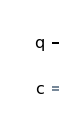

In [7]:
circuit.draw(output='mpl')

By default, the initial state of the qubit is |0> also known as the *ground state*.

&nbsp;

### Bloch sphere

It is then possible to create a one-to-one correspondence between a qubit state ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

<img src="https://www.researchgate.net/profile/Celia-Barcelos/publication/266440528/figure/fig5/AS:669395156230151@1536607650094/Figura-A1-Esfera-de-Bloch-O-estado-ps-de-um-qubitequbite-representado-por-um-ponto_W640.jpg" alt="" width="300 px" align="center">

By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis.

In [8]:
backend_vector = Aer.get_backend("statevector_simulator")

In [9]:
result = execute(circuit, backend_vector).result()
qstate= result.get_statevector(circuit)

In [10]:
print(qstate)

[1.+0.j 0.+0.j]


Import the visualization tools:

In [11]:
from qiskit.tools.visualization import *

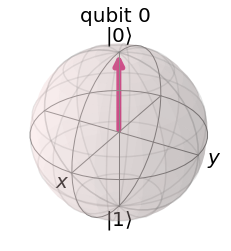

In [12]:
plot_bloch_multivector(qstate)

&nbsp;

## 2.1 Single-Qubit Gates<a id='single_operations'></a>

&nbsp;

Quantum gates/operations are usually represented as matrices. A gate acting on a single qubit is represented by a $2\times 2$ unitary matrix $U$ with complex entries. The action of the quantum gate on the qubit is determined by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

Some of the single-qubit gates available are:
- Pauli gates
- Hadamard gate
- Measurement gates

### Pauli gates

#### Gate $X$: bit-flip gate 

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. **This is the quantum analogue to a classical NOT gate.**

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-bit-flip.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-bit-flip.png">Source</a>)
</div>



The $X$ gate can be represented by a $2 \times 2$ matrix:
$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$


#### $Y$: bit-and-phase-flip gate

The $Y$ gate is defined by the matrix:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians.
This gate maps $| 0 \rangle $ to $i | 1 \rangle $, and $| 1 \rangle$ to $ - i | 0 \rangle$

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined by:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

Now we are going to add **quantum gates** to the circuit, namely **X gate**.  

In [13]:
# use the index of qr to define the position of the hadamard gate
# here we selected qubits 0 
circuit.x(qr)

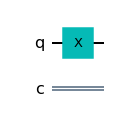

In [14]:
circuit.draw(output='mpl')

In [15]:
result = execute(circuit, backend_vector).result()
qstate= result.get_statevector(circuit)
print(qstate)

[0.+0.j 1.+0.j]


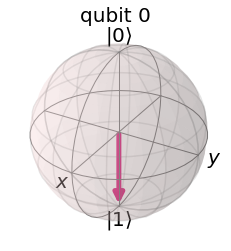

In [16]:
plot_bloch_multivector(qstate)

### Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. 

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-hadamard.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-hadamard.png">Source</a>)
</div>

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

The Hadamard gate is defined by:

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

&nbsp;

**Note**: The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

Now we are going to add another **quantum gates** to the circuit, namely **Hadamard gate**.  

In [17]:
# use the index of qr to define the position of the hadamard gate
# here we selected qubits 0 
circuit.h(qr[0])

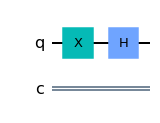

In [18]:
circuit.draw(output='mpl')

This gate creates **superposition**.

In [19]:
result = execute(circuit, backend_vector).result()
qstate= result.get_statevector(circuit)
print(qstate)

[ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


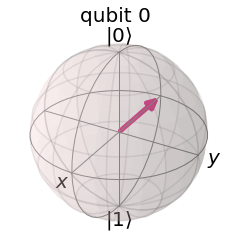

In [20]:
plot_bloch_multivector(qstate)

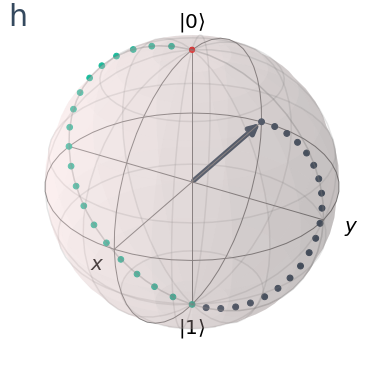

In [21]:
visualize_transition(circuit, fpg=20, spg=1, trace=True)

&nbsp;

### Measurement gate

A direct measurement causes the system to collapse to a deterministic state i.e. stabilise in a non-reversible way. Physically, we still don't know exactly how this collapse occurs, in what is called the [measurement problem](https://en.wikipedia.org/wiki/Measurement_problem).

A repeated measurement of the collapsed quantum system will return the same results, just like repeated readings of a bit string.

When we perform a measurement on a qubit, we observe either $|0\rangle$ or $|1\rangle$ - which is then interpreted as a binary digit, $0$ or $1$. As such, a single measurement of a quantum system yields at most 1 bit per qubit. When a quantum system is in a superposition of basis states, many more measurements are needed to accurately estimate probability amplitudes.



In Qiskit measurement operations can be performed by defining the correspondence between the measured qubit and the bit where the result of the operation (0 or 1) is going to be stored. 

Since the measuring process physically collapses the qubit into a classical state, QISKit does not allow for subsequent quantum operations on the measured qubit.

<div class="alert alert-block alert-info">

The measurement operation `measure(qr[i], cr[j])` is called on a circuit object by specifying the quantum register `qr`and qubit `i` to be measured, and the classical register `cr` and bit `j` which is to store the measurement value. A measurement can also be called over the complete register, provided that registers `qr` and `cr` are the same size: `measure(qr, cr)`.

</div>

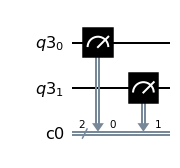

In [22]:
# Create quantum register with 2 qubits
qr = QuantumRegister(2)

# Create a classical register with 2 bits
cr = ClassicalRegister(2)

# Quantum circuit
qc_m = QuantumCircuit(qr, cr)

#Measurement operation
qc_m.measure(qr, cr)

# Draw circuit (using matplotlib)
qc_m.draw(output='mpl')

&nbsp;

# 3. Multi-qubit states<a id='multi_qubits'></a>

&nbsp;

Multiple quantum bits can be described with the ket notation. The tensor product is typically implicit; for a state composed of qubits $q_0$ and $q_1$:

&nbsp;

$$
|q_1\rangle \otimes |q_0\rangle =  |q_1\rangle |q_0\rangle = |q_1 q_0\rangle
$$

&nbsp;

**Note**: The ordering convention adopted in Qiskit writes the first qubit of a circuit at the far-right of the ket, and adds each additional qubit on the left:

&nbsp;

$$ |q_n\rangle \otimes \cdots \otimes |q_1\rangle \otimes |q_0\rangle $$

&nbsp;

Keep in mind that this ordering may be different than quantum circuits and algorithms described in scientific literature, and needs to be taken into account when analysing results of multi-qubit measurements, or the algebraic description of multi-qubit operations and states.

<div class="alert alert-block alert-info">

**Example 1.2 - Tensor product**

Consider two non-entangled qubits of a quantum circuit, $q_a$ and $q_b$. Their joint-state description can be written in bra-ket notation, with the tensor product providing an algebraic description of the state.

&nbsp;

$$|q_a q_b\rangle = |q_a\rangle \otimes |q_b\rangle = 
\begin{pmatrix}
q_{a1} \\ 
q_{a2}
\end{pmatrix} \otimes
\begin{pmatrix}
q_{b1} \\ 
q_{b2}
\end{pmatrix} =
\begin{pmatrix}
q_{a1}.q_{b1} \\
q_{a1}.q_{b2} \\
q_{a2}.q_{b1} \\
q_{a2}.q_{b2}
\end{pmatrix}
$$

&nbsp;

Using the tensor product, we can determine the vector of an $n$-qubit basis state. For example:

&nbsp;

$$|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}
$$
</div>

&nbsp;

### Entanglement and Bloch sphere for multi-qubit states

&nbsp;

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). 

**For a quantum system, its description is more than the sum of descriptions for each individual qubit.**

&nbsp;

## 3.1 Multi-qubit operations <a id='multi_op'></a>

&nbsp;

### CNOT gate 

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.

The matrix describing a CNOT depends on which qubit acts as control. For a state $|q_1 q_0\rangle$, if we apply a CNOT operation with $q_1$ as control, the matrix is described as:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

In [23]:
circuit_aux = QuantumCircuit(qr,cr)
circuit_aux.cx(qr[0],qr[1])

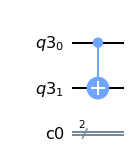

In [24]:
circuit_aux.draw(output='mpl')

To understand this section of the circuit you need to use the **UnitarySimulator**

In [25]:
backend_unitary = Aer.get_backend('unitary_simulator')

In [26]:
job = execute(circuit_aux, backend_unitary)
result = job.result()
unitary_matrix = result.get_unitary(circuit_aux, decimals=3)

# Show the results
print(unitary_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [27]:
# in this case you can use:
print(unitary_matrix.real)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


This is different from the expected matrix:

$$\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}$$

In most of the literature $q_0$ is the most significant qubit:

|control|target|control|target|
|-|-|-|-|
|input $q_0$|input $q_1$|output $q_0$|output $q_1$|
|0|0|0|0|
|0|1|0|1|
|**1**|**0**|**1**|**1**|
|**1**|**1**|**1**|**0**|

In Qiskit $q_0$ is the least significant qubit:

|target|control|target|control|
|-|-|-|-|
|input $q_1$|input $q_0$|output $q_1$|output $q_0$|
|0|0|0|0|
|**0**|**1**|**1**|**1**|
|1|0|1|1|
|**1**|**1**|**0**|**1**|

Matrix change in a similar way as the truth table.

### Merging Circuits

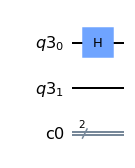

In [28]:
circuit = QuantumCircuit(qr,cr)
circuit.h(qr[0])
circuit.draw(output='mpl')

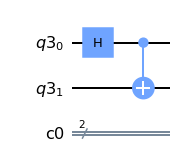

In [29]:
circuit = circuit + circuit_aux
circuit.draw(output='mpl')

In [30]:
result = execute(circuit, backend_vector).result()
qstate= result.get_statevector(circuit)
print(qstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### Simulate the quantum computer

First, add measure gate.

In [31]:
# Do you want one measure gate in every qr and creation of additional cr?
all_measure_f = False

if (all_measure_f):
    circuit.measure_all()
else:
    # use the index of qr to define the position of the measure gate 
    # add use the index of cr to define the position to save the value
    # In this example, the two option are equivalent
    circuit.measure(qr,cr)

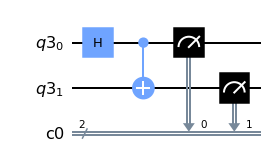

In [32]:
circuit.draw(output='mpl')

In [33]:
backend = Aer.get_backend("qasm_simulator")

In [34]:
result = execute(circuit, backend, shots=1024).result()
counts = result.get_counts(circuit)

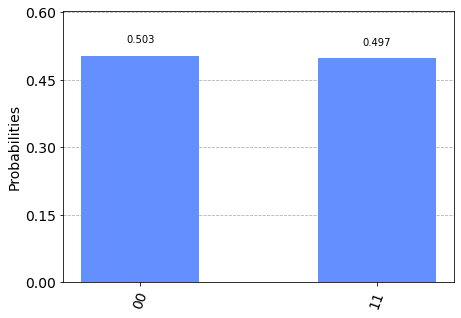

In [35]:
plot_histogram(counts)

# 4. Summary <a id='summary'></a>

To add gates to a circuit the **syntax** is:

`<quantum_circuit_name>.<gate>(<quantum_register_name>[<index>])`
    
In control gates the sintax is:

`<quantum_circuit_name>.<gate>(<quantum_register_name>[<index_of_control>],<quantum_register_name>[<index_of_target>])`


Some gates you can use:

(Let qr being the quantum register and qc being the quantum circuit.)


|Gate Name|Syntax |Matrix|How is it implemented|        
|-|-|-|-|
|Identity |qc.id(qr)|  $Id = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$|$u0(1)$|
|Bit-flip or Pauli-X| qc.x(qr)| $ X = \begin{bmatrix} 0&1\\1&0 \end{bmatrix}$|$u3(\pi,0,\pi)$|
|Bit and phase-flip or Pauli-Y| qc.y(qr)|$ Y = \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}$|$u3(\pi,\pi /\ 2,\pi /\ 2)$|
|Phase-flip or Pauli-Z| qc.z(qr)| $Z = \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}$|$u1(\pi)$|
|Hadamard|qc.h(qr)| $ H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$|$u2(0,\pi)$|
|S or $\sqrt{Z}$-Phase|qc.s(qr)|$ S =\begin{bmatrix} 1 & 0 \\ 0 & i\end{bmatrix}$|$u1(\pi /\ 2)$|
|S$^\dagger$ or conjugate $\sqrt{Z}$-Phase|qc.sdg(qr)| $S^\dagger =\begin{bmatrix} 1 & 0 \\ 0 & -i\end{bmatrix}$|$u1(-\pi /\ 2)$|
|T or $\sqrt{S}$-Phase|qc.t(qr)| $T=\begin{bmatrix}1 & 0 \\ 0 & e^{i \pi /\ 4}\end{bmatrix}$| $u1( \pi /\ 4)$|
|T$^\dagger$ or conjugate $\sqrt{S}$-Phase|qc.tdg(qr)| $ T^\dagger =\begin{bmatrix}1 & 0 \\ 0 & e^{-i \pi /\ 4}\end{bmatrix}$| $u1( -\pi /\ 4)$|



Multiqubit gates:

The matrix looks different from the rest of the bibliography because qiskit uses different definitions of least and most significant qubits.

Let control be the the 0 qubit and the target the 1 qubit.

|Gate Name|Syntax |Matrix|        
|-|-|-|
|Controlled-X or controlled-Not|qc.cx(qr\[control\],qr\[target\])|$CX = \begin{bmatrix}1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}$  |
|Controlled-Y|qc.cy(qr\[control\],qr\[target\])|$CY = \begin{bmatrix}1&0&0&0\\0&0&0&-i\\0&0&1&0\\0&i&0&0\end{bmatrix}$   |
|Controlled-Z or controlled-Phase|qc.cz(qr\[control\],qr\[target\])| $CZ =\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}$  |
|Controlled-Hadamard|qc.ch(qr\[control\],qr\[target\])|$CH = \begin{bmatrix}1&0&0&0\\0&\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\0&0&1&0\\0&\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\end{bmatrix}$  |
|SWAP|qc.swap(qr\[control\],qr\[target\])| $SAWP =\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}$  |

Finally, there is the measure gate.

* qc.measure(qr,cr) - it adds measures to all qubits
* qc.measure_all() - it adds measure to all qubits and creates the classical space to register the measures
* qc.measure(qr\[0\],cr\[0\]) - it adds a measure to qubit 0 and saves value in classical register 0

# Exercises <a id='exer'></a>

In [3]:
backend_state = Aer.get_backend("statevector_simulator")
backend_unitary = Aer.get_backend('unitary_simulator')
backend = Aer.get_backend("qasm_simulator")

Create 1 quantum register and 1 classical registers (qr and cr).

In [4]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1,'c')

# 1. 

**a)** Create a quantum circuit.

**b)** What is the state of qubit 0?

**c)** Excite the state of the qubit using only one Pauli gate, i.e., send the qubit state to $|1>$.

**d)** Draw the circuit.

**e)** Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

# 2. 

**a)** Create a quantum circuit.

**b)** Make the equivalent to the identity gate using only gates X.

**c)** Draw the circuit.

**d)** Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

**e)** What is the expected output of a circuit with 3 X-gates? 

**f)** What is the expected output of a circuit with $N$ X-gates? *Tip: start to assume is $N$ an odd number; then consider $N$ an even number*.

# 3. 

**a)** What is the result of not creating a new quantum circuit in each exercise?

# 4.

Let's introduce a new gate, Hadamard, the superposition gate. Qiskit simply calls it `h`.

**a)** Create a quantum circuit.

**b)** Create superposition in the qubit state using the hadamard gate.

**c)** Draw the circuit.

**d)** Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

# 5.

**a)** Create a new quantum circuit and apply the Hadamard gate 2 times and print its state. 

**b)** Create a new quantum circuit and apply the Hadamard gate 3 times and print its state. 

**c)** Create a new quantum circuit and apply the Hadamard gate 5 times and print its state. 

**d)** Create a new quantum circuit and apply the Hadamard gate 10 times and print its state. 

**e)** What is the expected output of a circuit with $N$ Hadamard-gates? *Tip: start to assume is $N$ an odd number; then consider $N$ an even number*.

# 6

**a)** Create a new quantum circuit and add 1 Hadamard gate and a measure gate. 

Draw circuit.

**b)** Run this circuit 100 times. *Tip: use the `qasm_simulator` backend.*

**c)** What can you conclude about this circuit?

# 7

**a)** Create a new quantum circuit and change the initial  state to the superposition state.

Draw the circuit.

**b)** Add an X-gate to the previous circuit.

Draw the circuit.

**c)** Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

**d)** Explain the output.

# 8

**a)** Create a new quantum circuit, add one quantum Z-gate. Draw the circuit.

**b)**  Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

**c)** Add another Z gate to the previous quantum circuit. Draw the circuit.

**d)** Simulate the circuit with the `statevector_simulator`.

Optional: add representation with the Bloch sphere.

**e)** Do again the exercises a), b), c), and d), but add a Hadamard gate before the first Z gate (in exercise a)).

**f)** Explain the output.

# 9

**a)** I want to get from the default state $|0>$ to state $|1>$ but I can't apply X gate. Can you find a way to get the same result with Hadamard gates and Z-gates? Draw and test your solution with the state vector simulator.

**b)** Simulate the unitary matrix of the circuit.

## Multiqubit Gates

Create 2 quantum register and 2 classical registers (qr_m and cr_m).

# 10

**a)** Create a quantum circuit and add a CX gate. Where $q_0$ is the target and $q_1$ is the control. Draw the circuit.

**b)** Simulate the circuit with the `statevector_simulator`.

**c)** Why shouldn't you use the Bloch sphere representation?

**d)** Simulate the circuit with `unitary_simulator`.

**e)** Create a new quantum circuit with X gate in qubit 1. Draw the circuit.

**f)** Merge the previous circuit to the circuit created in a) and simulate with vector simulator.

# 11

Now let's test something less trivial.

**a)** Find a circuit that does the same as a control-Z. Use CX and Hadamard gates.